<a href="https://colab.research.google.com/github/Krittika91/Social-Media-Analytics/blob/main/SMA_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MSBA Social Media Analytics Assignment No 1

##Team Members:
Akash Dhruva (avd667)

Krittika Deshwal (kd29275)

Mayank Gupta (mg66426)

Rahul Borana (rb47374)

Saiyam Shah (Sns3694)

Srishty Mishra (sm82386)


##PART I: Build a model predicting influencers


####Importing and cleaning the data

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)
import re
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
# Load your dataset
df = pd.read_csv('train.csv')

In [ ]:
df.drop_duplicates(inplace=True)
df.columns


Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [ ]:
df2=pd.DataFrame()
df2 = pd.DataFrame(columns=[f'{col.split("_",1)[1]}_div' for col in df.columns[1:12]])

In [ ]:
for i in range(1, 12):
    numerator_col = df.columns[i]
    denominator_col = df.columns[i + 11]
    df2[df2.columns[i-1]] = df[numerator_col] / df[denominator_col]
    print(numerator_col,denominator_col)
df2 = df2.fillna(0)

A_follower_count B_follower_count
A_following_count B_following_count
A_listed_count B_listed_count
A_mentions_received B_mentions_received
A_retweets_received B_retweets_received
A_mentions_sent B_mentions_sent
A_retweets_sent B_retweets_sent
A_posts B_posts
A_network_feature_1 B_network_feature_1
A_network_feature_2 B_network_feature_2
A_network_feature_3 B_network_feature_3


In [ ]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
df2.fillna(df2.mean(), inplace=True)
np.isinf(df2).sum().sum()

0

In [ ]:
df2.isna().sum().sum()

0

In [ ]:
df2['Choice']=df['Choice']
df=df2

In [ ]:
df.columns

Index(['follower_count_div', 'following_count_div', 'listed_count_div',
       'mentions_received_div', 'retweets_received_div', 'mentions_sent_div',
       'retweets_sent_div', 'posts_div', 'network_feature_1_div',
       'network_feature_2_div', 'network_feature_3_div', 'Choice'],
      dtype='object')

###Calculating the Corelation Matrix

In [ ]:

# Assuming df is your DataFrame
# If your DataFrame has non-numeric columns, you might want to select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                       follower_count_div  following_count_div  \
follower_count_div               1.000000             0.007198   
following_count_div              0.007198             1.000000   
listed_count_div                 0.627882             0.004445   
mentions_received_div            0.050563            -0.001081   
retweets_received_div            0.123299            -0.002145   
mentions_sent_div                0.032036             0.002867   
retweets_sent_div                0.037380            -0.000312   
posts_div                        0.024898             0.001151   
network_feature_1_div            0.161133            -0.001846   
network_feature_2_div            0.006806             0.004886   
network_feature_3_div            0.007807            -0.000111   
Choice                           0.062112             0.023278   

                       listed_count_div  mentions_received_div  \
follower_count_div             0.627882               0.050563   
following

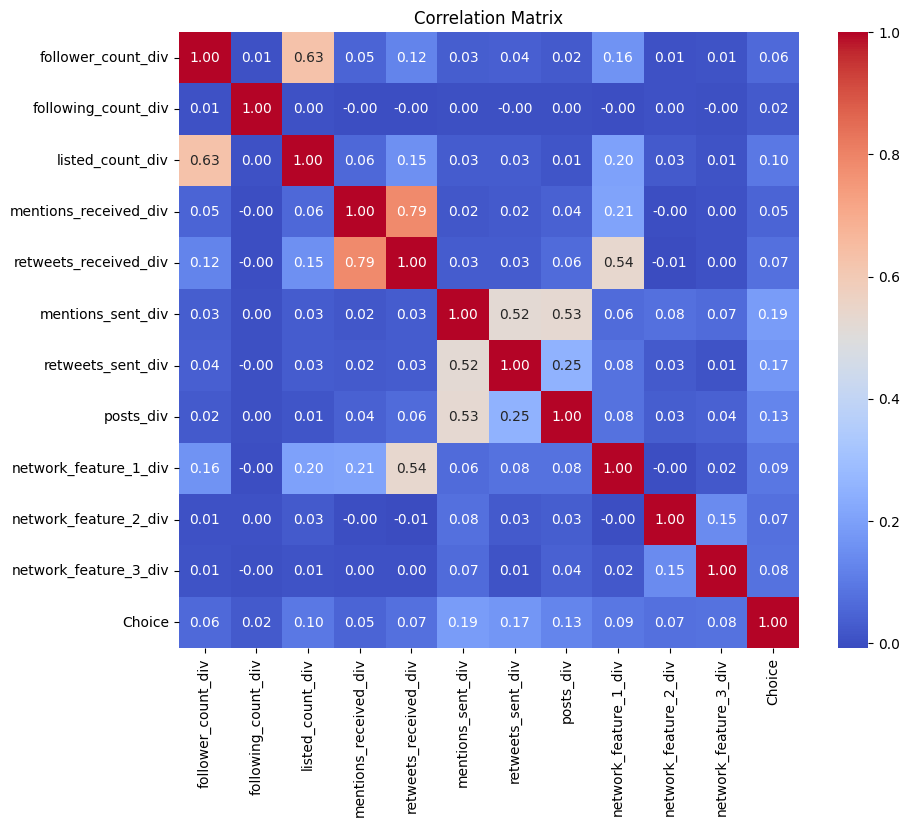

In [ ]:
# You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
correlation_matrix

,follower_count_div,following_count_div,listed_count_div,mentions_received_div,retweets_received_div,mentions_sent_div,retweets_sent_div,posts_div,network_feature_1_div,network_feature_2_div,network_feature_3_div,Choice
follower_count_div,1.000000,0.007198,0.627882,0.050563,0.123299,0.032036,0.037380,0.024898,0.161133,0.006806,0.007807,0.062112
following_count_div,0.007198,1.000000,0.004445,-0.001081,-0.002145,0.002867,-0.000312,0.001151,-0.001846,0.004886,-0.000111,0.023278
listed_count_div,0.627882,0.004445,1.000000,0.055892,0.154674,0.029699,0.029007,0.014898,0.201246,0.026462,0.008996,0.096194
mentions_received_div,0.050563,-0.001081,0.055892,1.000000,0.786722,0.017264,0.024631,0.042366,0.207731,-0.001002,0.004465,0.047181
retweets_received_div,0.123299,-0.002145,0.154674,0.786722,1.000000,0.030098,0.028914,0.063465,0.537626,-0.008336,0.004849,0.074908
mentions_sent_div,0.032036,0.002867,0.029699,0.017264,0.030098,1.000000,0.519548,0.530188,0.064427,0.075798,0.065507,0.188355
retweets_sent_div,0.037380,-0.000312,0.029007,0.024631,0.028914,0.519548,1.000000,0.254043,0.078761,0.025871,0.010332,0.169014
posts_div,0.024898,0.001151,0.014898,0.042366,0.063465,0.530188,0.254043,1.000000,0.078879,0.034297,0.040621,0.126114
network_feature_1_div,0.161133,-0.001846,0.201246,0.207731,0.537626,0.064427,0.078761,0.078879,1.000000,-0.003259,0.019304,0.092507
network_feature_2_div,0.006806,0.004886,0.026462,-0.001002,-0.008336,0.075798,0.025871,0.034297,-0.003259,1.000000,0.145264,0.074396


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Splitting the data into features and target variable
X = df.drop('Choice', axis=1)
y = df['Choice']

# Function to train and evaluate Random Forest models
def train_evaluate_rf(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return r2_score(y_test, y_pred)

# Create 6 models by removing one, two, and three columns at a time
columns_combinations = [['mentions_received_div'], ['retweets_received_div'],
    ['mentions_received_div', 'retweets_received_div']
]

for columns_to_remove in columns_combinations:
    # Create a subset of columns to train the model
    selected_features = [col for col in X.columns if col not in columns_to_remove]

    X_subset = X[selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Train and evaluate the model
    r2 = train_evaluate_rf(X_train, X_test, y_train, y_test)

    # Print the result
    print(f"Columns removed: {columns_to_remove}, R2 Score: {round(r2,4)}")


Columns removed: ['mentions_received_div'], R2 Score: 0.3612
Columns removed: ['retweets_received_div'], R2 Score: 0.3599
Columns removed: ['mentions_received_div', 'retweets_received_div'], R2 Score: 0.3586


In [ ]:
df.drop(columns=['mentions_received_div'],inplace=True)

###Identifying important features

In [ ]:
# Assuming df is your DataFrame with the target variable 'Choice'
# Identify features and target variable
X = df.drop('Choice', axis=1)
y = df['Choice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Make predictions on the entire dataset and add a new column with predicted values
df['Predicted_Choice'] = rf_model.predict(X)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Display feature importance
print("\nFeature Importance:\n", feature_importance)

Accuracy: 0.7635
Confusion Matrix:
 [[402 135]
 [119 418]]

Feature Importance:
                  Feature  Importance
2       listed_count_div    0.202937
0     follower_count_div    0.164265
7  network_feature_1_div    0.152186
3  retweets_received_div    0.094967
4      mentions_sent_div    0.071727
6              posts_div    0.065523
1    following_count_div    0.065421
8  network_feature_2_div    0.064164
9  network_feature_3_div    0.060530
5      retweets_sent_div    0.058281


In [ ]:
#model with only 5 features
X = df[['listed_count_div','follower_count_div','network_feature_1_div','retweets_received_div','mentions_sent_div']]
y = df['Choice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Make predictions on the entire dataset and add a new column with predicted values
#df['Predicted_Choice'] = rf_model.predict(X)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7598


####Analysis from the various models:



1.   **Feature Importance:** From the output, it's evident that 'listed_count_div', 'follower_count_div', and 'network_feature_1_div' are the top three features contributing most to the model's predictions, according to their importance scores.
2.   **Feature Selection:** To potentially improve model efficiency and reduce complexity, a subset of features is selected based on their importance scores.
The model is then trained and evaluated using only the top five features identified earlier.
Despite the reduction in the number of features, the model still achieves a respectable accuracy score of around 75.98%.



In [ ]:
df_choice = df[['Choice', "Predicted_Choice"]]
df_temp = pd.read_csv('train.csv')
df_temp.drop_duplicates(inplace=True)
df_temp=df_temp[['A_follower_count', 'B_follower_count']]
df = pd.concat([df_temp, df_choice], axis=1)

### Part II: Financial Value Calculation

Three strategies evaluated:


1.   Profit without any analytics
2.   Profit from applying our chosen model
3.   Profit from assuming perfect analytics

Without Analytics:
- Every person, influencer or not, is paid \$5 to tweet once about the promotion.
- There's a 0.01% chance of a sale from an influencer's tweet, with the retailer making \$10 profit per sale.
- The cost is \$5 per tweet for all 100 tweeters, leading to a total cost of \$500.

*With Analytics:*
- Only influencers identified by the model are paid, and they are paid \$10 to tweet twice.
- The chance of a sale from two influencer tweets increases to 0.015%.
- The cost is $10 per identified influencer, and there's no cost for non-influencers.

*Lift from Using Analytics:*
- The lift is the additional net profit gained by paying only identified influencers to tweet twice, as opposed to paying everyone to tweet once.
- This lift would be due to higher sales probabilities and reduced costs by not paying non-influencers.

*With Perfect Analytics:*
- The retailer only pays the actual influencers, with perfect accuracy.
- Influencers are paid $10 to tweet twice, with a 0.015% chance of a sale per influencer tweet.

*Lift from Using Perfect Analytics:*
- The lift is the maximum possible net profit, with no wasted spend on non-influencers and all influencers tweeting twice.
- This represents the ideal scenario where the retailer fully capitalizes on influencer tweets without incurring unnecessary costs.

\

In [ ]:
df_q2 = df[['Choice', 'A_follower_count', 'B_follower_count', 'Predicted_Choice']]

In [ ]:
df_q2.head()

,Choice,A_follower_count,B_follower_count,Predicted_Choice
0,0,228,34463,0
1,0,21591,39262,0
2,0,7310,3622,0
3,0,20,19562,0
4,1,45589,7554,1


In [ ]:
df_q2['noanalyticsprofit'] = np.where((df_q2['Choice'] == 1),
                           df_q2['A_follower_count'] * 0.0001 * 10 - 10,
                           df_q2['B_follower_count'] * 0.0001 * 10 - 10)

In [ ]:
print("Profit is : ",df_q2['noanalyticsprofit'].sum())

Profit is :  5189270.991


In [ ]:
df_q2['analyticsprofit'] = np.where((df_q2['Choice'] == df_q2['Predicted_Choice']) & (df_q2['Predicted_Choice'] == 1), df_q2['A_follower_count'] * 0.00015 * 10 - 10,
                                    (np.where((df_q2['Choice'] == df_q2['Predicted_Choice']) & (df_q2['Predicted_Choice'] == 0),
                                              df_q2['B_follower_count'] * 0.00015 * 10 - 10, -10)))

In [ ]:
print("Profit with Analytics is : ",df_q2['analyticsprofit'].sum())

Profit with Analytics is :  7569771.726499999


In [ ]:
print("Difference in Profit by using the Analytical model instead of the non-Analytical one: ",df_q2['analyticsprofit'].sum() - df_q2['noanalyticsprofit'].sum())
print("Lift in profit after using analytics is: ", df_q2['analyticsprofit'].sum()/df_q2['noanalyticsprofit'].sum())

Difference in Profit by using the Analytical model instead of the non-Analytical one:  2380500.7354999986
Lift in profit after using analytics is:  1.4587350977870714


In [ ]:
df_q2['perfectprofit'] = np.where((df_q2['Choice'] == 1),
                           df_q2['A_follower_count'] * 0.00015 * 10 - 10,
                           df_q2['B_follower_count'] * 0.00015 * 10 - 10)

In [ ]:
print("Profit with Perfect Analytics is : ",df_q2['perfectprofit'].sum())

Profit with Perfect Analytics is :  7810746.4865


In [ ]:
print("Difference in Profit by using the Perfect Analytical model instead of the non-Analytical one: ",df_q2['perfectprofit'].sum() - df_q2['noanalyticsprofit'].sum())
print("Lift in profit after using analytics is: ", df_q2['perfectprofit'].sum()/df_q2['noanalyticsprofit'].sum())

Difference in Profit by using the Perfect Analytical model instead of the non-Analytical one:  2621475.4954999993
Lift in profit after using analytics is:  1.5051722101325116


**Using the analytical model:**The difference in profit of $2,380,500.74 indicates that using the analytical model to target influencers yields substantially higher net profits compared to a non-analytical approach. The lift of 1.45 means that with the analytical model, the retailer earns almost one and a half times more profit from the influencer marketing campaign than without it. Essentially, the analytics-driven strategy is significantly more cost-effective and profitable

**Using the perfect analytical model:** instead of a non-analytical approach yields an additional profit of approximately $2,621,475.50. The lift of 1.50 indicates the upper bound of profits assuming every influencer was identified accurately, compared to not using analytics, signifying a highly efficient use of marketing resources

In [ ]:
dfq3= feature_importance[0:5]

### Part III: Finding influencers from Twitter

In [ ]:
tweets_df = pd.read_csv("tweets.csv")

In [ ]:
output_df= pd.DataFrame(columns=['Column 1', 'Column 2', 'Column 3'])

In [ ]:
def extract_action_and_usernames(text):
    rt_pattern = re.compile(r'^RT @(\w+):')
    mention_pattern = re.compile(r'@(\w+)')

    rt_match = rt_pattern.search(text)
    mentions = mention_pattern.findall(text)

    if rt_match:
        rt_user = rt_match.group(1)
        if rt_user not in mentions:
            mentions.insert(0, rt_user)
        return 'RT', mentions
    elif mentions:
        return 'Mention', mentions
    else:
        return 'None', []

In [ ]:
for index, row in tweets_df.iterrows():
    action, users = extract_action_and_usernames(row['text'])
    screen_name = row[' screen_name'].strip()

    #replies
    if pd.notnull(row[' inreplyto']):
        action = 'Reply'

    if action == 'RT':
        output_df = output_df.append({'Column 1': f'@{screen_name}', 'Column 2': f'@{users[0]}', 'Column 3': 'RT'}, ignore_index=True)
        # mentions within the retweet
        for user in users[1:]:
            output_df = output_df.append({'Column 1': f'@{screen_name}', 'Column 2': f'@{user}', 'Column 3': 'Mention'}, ignore_index=True)
    elif action in ['Mention', 'Reply']:

        for user in users:
            output_df = output_df.append({'Column 1': f'@{screen_name}', 'Column 2': f'@{user}', 'Column 3': action}, ignore_index=True)
        if action == 'Reply' and not users:
            output_df = output_df.append({'Column 1': f'@{screen_name}', 'Column 2': f'@{screen_name}', 'Column 3': 'Reply'}, ignore_index=True)
    else:
        # Regular tweet
        output_df = output_df.append({'Column 1': f'@{screen_name}', 'Column 2': f'@{screen_name}', 'Column 3': 'Tweet'}, ignore_index=True)


In [ ]:
output_df.to_csv('tweets_analysis3.csv', index=False)

In [ ]:
tweets_analysis_df = pd.read_csv("tweets_analysis3.csv")

###Visualizing the Interaction Network

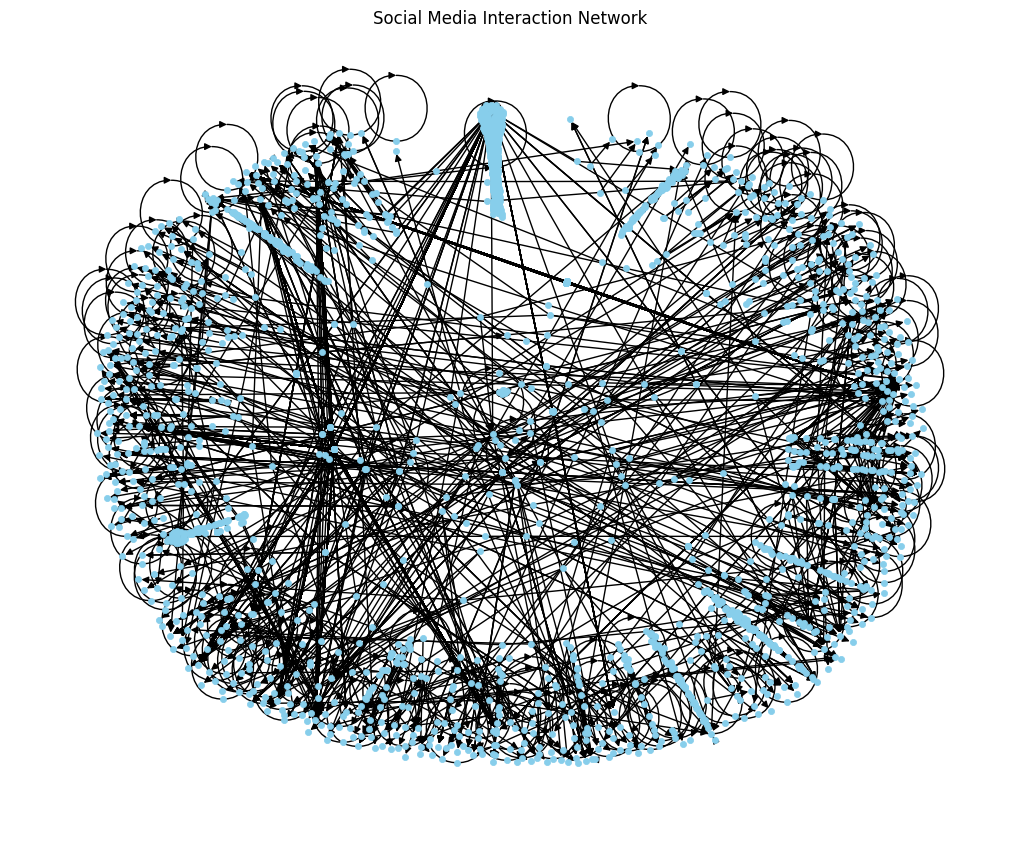

In [ ]:
G = nx.DiGraph()

for index, row in tweets_analysis_df.iterrows():
    G.add_edge(row['Column 1'], row['Column 2'], interaction=row['Column 3'])

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=False, node_color='skyblue', node_size=20, edge_color='k', linewidths=0.5, font_size=5, arrows=True)
plt.title('Social Media Interaction Network')
plt.show()

###Computing the degree, betweenness and closeness centrality scores for each node in the network

In [ ]:
degree = nx.degree_centrality(G)
between = nx.betweenness_centrality(G)
close = nx.closeness_centrality(G)

df = pd.DataFrame([degree, between,close]).T

df.reset_index(inplace = True)
df.columns = ['Username','Degree','Between','Close']
df.head()

,Username,Degree,Between,Close
0,@2Sherryazar1956,0.000887,0.000000e+00,0.000000
1,@jimmichael720,0.002217,3.934862e-07,0.000887
2,@TrueCrimePoli,0.000443,0.000000e+00,0.000000
3,@ChrisStigall,0.001330,0.000000e+00,0.000443
4,@WintWahLwin15,0.000443,0.000000e+00,0.000000


In [ ]:
df['Username'] = df['Username'].str.lstrip('@')
df.head()

,Username,Degree,Between,Close
0,2Sherryazar1956,0.000887,0.000000e+00,0.000000
1,jimmichael720,0.002217,3.934862e-07,0.000887
2,TrueCrimePoli,0.000443,0.000000e+00,0.000000
3,ChrisStigall,0.001330,0.000000e+00,0.000443
4,WintWahLwin15,0.000443,0.000000e+00,0.000000


In [ ]:
merged_df = pd.merge(tweets_df, df, left_on = ' screen_name', right_on = 'Username', how='left')
merged_df.drop_duplicates(inplace=True)

In [ ]:
output_df['Column 1'] = output_df['Column 1'].str.lstrip('@')
output_df['Column 2'] = output_df['Column 2'].str.lstrip('@')

output_df.head()

,Column 1,Column 2,Column 3
0,2Sherryazar1956,jimmichael720,RT
1,TrueCrimePoli,ChrisStigall,RT
2,WintWahLwin15,ForeignPolicy,RT
3,england_donald,CoryMillsFL,RT
4,Brenda18291262,Chicago1Ray,RT


In [ ]:
# Pivot Table
pivot_sent = output_df.pivot_table(index='Column 1', columns='Column 3', aggfunc='size', fill_value=0)
pivot_received = output_df.pivot_table(index='Column 2', columns='Column 3', aggfunc='size', fill_value=0)

# Rename columns
pivot_sent.columns = [f'{col} Sent' for col in pivot_sent.columns]
pivot_received.columns = [f'{col} Received' for col in pivot_received.columns]

# Merge pivot tables

all_usernames = pivot_sent.index.union(pivot_received.index)
pivot_sent = pivot_sent.reindex(all_usernames, fill_value=0)
pivot_received = pivot_received.reindex(all_usernames, fill_value=0)

summary_df = pd.concat([pivot_sent, pivot_received], axis=1)

# Reset index
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Username'}, inplace=True)

summary_df


,Username,Mention Sent,RT Sent,Reply Sent,Tweet Sent,Mention Received,RT Received,Reply Received,Tweet Received
0,0xcusesfitness,1,1,0,0,0,0,0,0
1,104thSpringer,14,2,0,0,0,0,0,0
2,11thHour,0,0,0,0,0,0,1,0
3,12Paws3Tails,0,2,0,0,0,0,0,0
4,1325Adams,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2251,yupperon,0,1,0,0,0,0,0,0
2252,zekeshelton2,0,1,0,0,0,0,0,0
2253,zelda1427,0,0,0,0,0,0,1,0
2254,zetta1955rose,0,1,0,0,0,0,0,0


In [ ]:
final_df = pd.merge(merged_df, summary_df, on='Username', how='left')
final_df.head()


,ids,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text,Username,Degree,Between,Close,Mention Sent,RT Sent,Reply Sent,Tweet Sent,Mention Received,RT Received,Reply Received,Tweet Received
0,1.409150e+18,2Sherryazar1956,1992,1,NaN,0,2475,0,NW Arkansas,RT @jimmichael720: Biden doesn't have the ball...,2Sherryazar1956,0.000887,0.0,0.0,0,2,0,0,0,0,0,0
1,1.049790e+18,TrueCrimePoli,652,8,NaN,0,846,0,"Boston, MA",RT @ChrisStigall: Biden says\n\nBiden says inf...,TrueCrimePoli,0.000443,0.0,0.0,0,1,0,0,0,0,0,0
2,1.357290e+18,WintWahLwin15,118,162,NaN,0,313,0,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul...",WintWahLwin15,0.000443,0.0,0.0,0,1,0,0,0,0,0,0
3,3.617900e+09,england_donald,523,65,NaN,0,263,2,"Florida, USA",RT @CoryMillsFL: While Bidens State Department...,england_donald,0.000443,0.0,0.0,0,1,0,0,0,0,0,0
4,1.360330e+18,Brenda18291262,280,314,NaN,0,724,0,NaN,RT @Chicago1Ray: If Illegals can file suit on ...,Brenda18291262,0.000443,0.0,0.0,0,1,0,0,0,0,0,0


###Creating an influence score for each user by using the coefficients from the model in Part I as weights for the variables

In [ ]:
Score_df=final_df[['Username',' followers',' friends',' listed','Degree','Between','Close','Mention Sent', 'RT Sent', 'Reply Sent', 'Tweet Sent',
       'Mention Received', 'RT Received', 'Reply Received', 'Tweet Received']]
Score_df.drop_duplicates(inplace=True)

In [ ]:
for i in Score_df.iloc[:, 1:]:
    mean = Score_df[i].mean()
    std = Score_df[i].std()

    Score_df[i] -= mean
    Score_df[i] /= std

Taking Weights from best model

In [ ]:
weights = {
    'listed_count_div': 0.202937,
    'follower_count_div': 0.164265,
    'network_feature_1_div': 0.152186,
    'retweets_received_div': 0.094967,
    'mentions_sent_div': 0.071727
}


Score_df['Score'] = (
    Score_df[' followers'] * weights['follower_count_div'] +
    Score_df['Degree'] * weights['network_feature_1_div'] +
    Score_df['RT Received'] * weights['retweets_received_div'] +
    Score_df['Mention Sent'] * weights['mentions_sent_div'] +
    Score_df[' listed'] * weights['listed_count_div']
)


Score_df.head()

,Username,followers,friends,listed,Degree,Between,Close,Mention Sent,RT Sent,Reply Sent,Tweet Sent,Mention Received,RT Received,Reply Received,Tweet Received,Score
0,2Sherryazar1956,-0.034157,0.179764,-0.080069,-0.008838,-0.041038,-0.073733,-0.296927,0.631777,-0.155113,-0.228423,-0.028323,-0.08161,-0.091425,-0.228423,-0.052253
1,TrueCrimePoli,-0.044315,-0.256968,-0.080069,-0.329996,-0.041038,-0.073733,-0.296927,-0.220442,-0.155113,-0.228423,-0.028323,-0.08161,-0.091425,-0.228423,-0.102797
2,WintWahLwin15,-0.048363,-0.399865,-0.080069,-0.329996,-0.041038,-0.073733,-0.296927,-0.220442,-0.155113,-0.228423,-0.028323,-0.08161,-0.091425,-0.228423,-0.103462
3,england_donald,-0.045293,-0.413269,-0.077234,-0.329996,-0.041038,-0.073733,-0.296927,-0.220442,-0.155113,-0.228423,-0.028323,-0.08161,-0.091425,-0.228423,-0.102382
4,Brenda18291262,-0.047135,-0.289676,-0.080069,-0.329996,-0.041038,-0.073733,-0.296927,-0.220442,-0.155113,-0.228423,-0.028323,-0.08161,-0.091425,-0.228423,-0.103260


####List of Top 20 Influencers

In [ ]:
Score_df.sort_values(by='Score',ascending=False)[:20]

,Username,followers,friends,listed,Degree,Between,Close,Mention Sent,RT Sent,Reply Sent,Tweet Sent,Mention Received,RT Received,Reply Received,Tweet Received,Score
662,seanhannity,41.282751,-0.482171,28.185123,22.472281,-0.041038,29.330893,-0.296927,-1.072660,-0.155113,1.479576,-0.028323,25.993990,22.980678,1.479576,18.368356
1713,ForeignPolicy,8.890589,-0.233376,27.674793,4.808545,-0.041038,6.519479,-0.296927,-1.072660,-0.155113,1.479576,-0.028323,6.515831,-0.091425,1.479576,8.405936
1675,Jereme45,0.077595,3.580588,-0.064475,20.545328,-0.041038,26.810497,-0.296927,-1.072660,-0.155113,1.479576,-0.028323,26.936482,-0.091425,1.479576,5.663152
906,dYu7vug97v2Qcqh,-0.042466,0.855103,-0.078651,7.377816,40.349087,0.766400,18.403816,27.902766,30.981443,-0.228423,-0.028323,12.170780,-0.091425,-0.228423,3.575736
1135,CatoInstitute,2.701860,1.417036,12.071454,0.312321,-0.041038,0.346334,-0.296927,-1.072660,-0.155113,1.479576,-0.028323,0.232554,-0.091425,1.479576,2.941884
201,dcexaminer,2.139309,-0.409516,5.553407,3.202751,9.279760,3.706862,-0.296927,-0.220442,-0.155113,6.603573,-0.028323,6.201667,-0.091425,6.603573,2.533475
1890,WayneDupreeShow,3.231610,3.075491,2.942219,3.845068,-0.041038,5.485966,0.014752,-1.072660,-0.155113,-0.228423,-0.028323,5.573339,-0.091425,-0.228423,2.243432
65,imUrB00gieman,0.124837,5.558884,-0.034706,3.845068,-0.041038,4.967060,-0.296927,-1.072660,-0.155113,3.187575,-0.028323,6.515831,-0.091425,3.187575,1.196120
310,billroggio,0.351979,-0.298792,1.414064,2.881592,-0.041038,3.706862,-0.296927,-1.072660,-0.155113,1.479576,-0.028323,3.060029,-0.091425,1.479576,1.052626
1810,jalen_drummond,0.018974,-0.297183,-0.043212,3.202751,-0.041038,4.126928,-0.296927,-1.072660,-0.155113,1.479576,-0.028323,4.316684,-0.091425,1.479576,0.870406


The above table displays the top 20 Twitter accounts with the highest influence scores, as determined by our Influence Score Model. Notably, @seanhannity ranks as the leading influencer in the conversation surrounding politics, war and diplomacy which aligns with expectations given their substantial follower count of 5.4 million.

In this study, we have achieved the following milestones:
- Created an Analytical Model that distinguishes influential from non-influential Twitter users through training on a dataset obtained from Kaggle.
- Assessed the economic impact of our model by contrasting it with a baseline model that indiscriminately selects users for paid influencer marketing campaigns.
- Collected and analyzed recent tweets in getting the 20 most influential individuals, utilizing an influence score derived random forest model's coefficients.

In summary, our findings underscore the effectiveness of applying analytical techniques to identify the most influential individuals for targeted marketing initiatives.